In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df=pd.read_csv(r'D:\OM\Codes And Projects\Data Science Projects\ML Model Implementations\2) Multiple Linear Regression\Project 1\data\economic_index.csv')

In [19]:
df_original=df

In [5]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [21]:
# remove unnecessary columns 
df.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True, axis=1)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
# check for missing values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

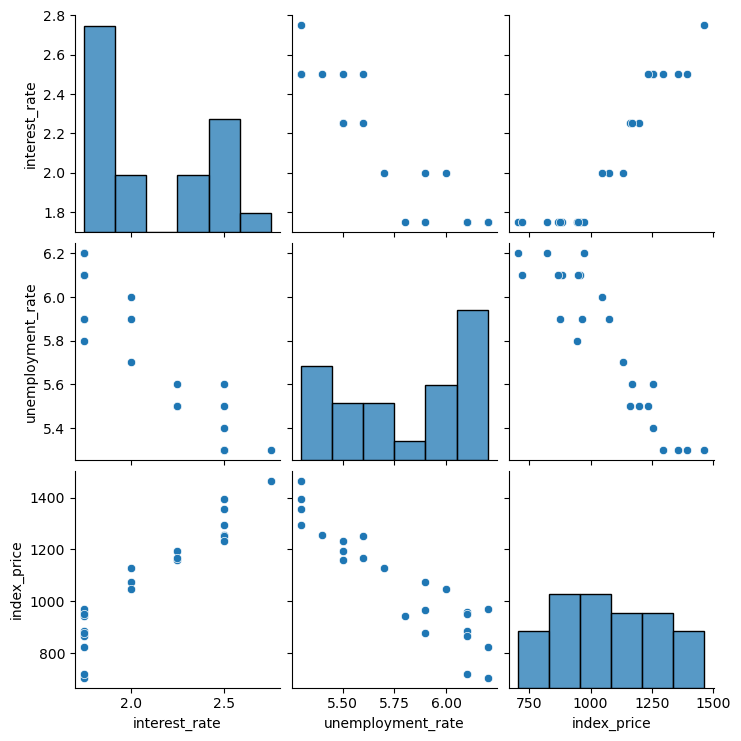

In [22]:
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


### intreset rate and index price are positivly correlated with each other 
### unemployment rate and index price are inversaly correlted with each other

In [24]:
# extract input and output features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [27]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.25)

In [29]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


<Axes: xlabel='interest_rate', ylabel='index_price'>

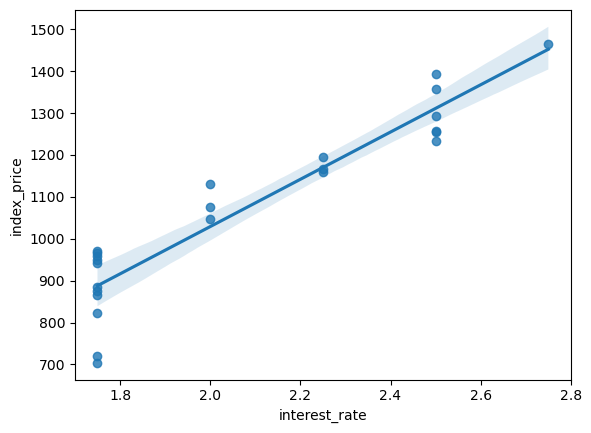

In [31]:
sns.regplot(x="interest_rate", y="index_price", data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

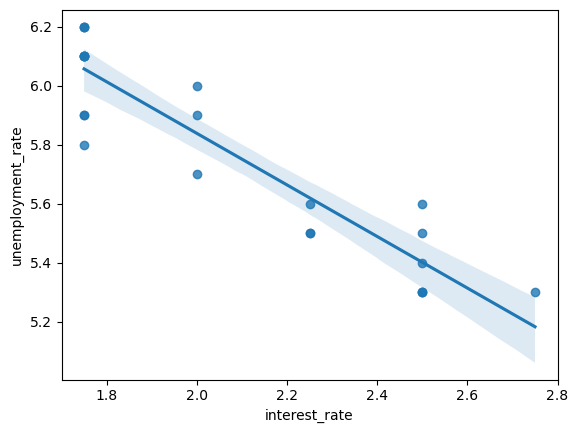

In [32]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

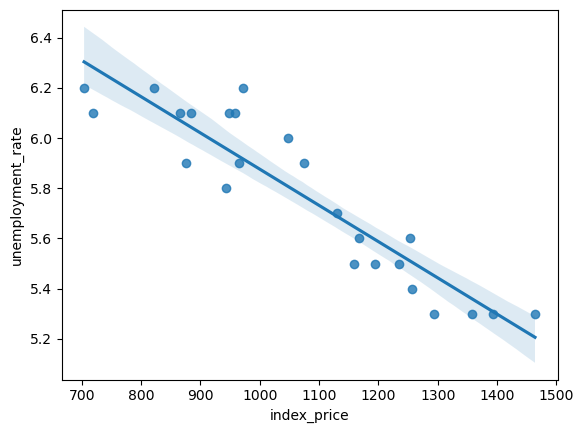

In [34]:
sns.regplot(x='index_price', y='unemployment_rate', data=df)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [37]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regression=LinearRegression()

In [42]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
print(regression.coef_)
# for two feature there's two slope or coefficent (theta 1 and theta 2)

[  88.27275507 -116.25716066]


In [ ]:
# intercept (c)
print(regression.intercept_)

1053.4444444444443


In [54]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


### index_price = (1053.44) + (88.27) * (intrest_rate) + (-116.257) * (unemployment_rate)

In [43]:
y_pred=regression.predict(X_test)

In [44]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

73.80444932337099
8108.567426306611
90.04758423359624


In [49]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)

print("r2 squire: ", score)
print("Adjusted r2 square: ", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 squire:  0.7591371539010254
Adjusted r2 square:  0.5985619231683756


## Assumptions

In [58]:
print(y_test)

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64


In [57]:
print(y_pred)

[1180.7466813   802.74279699 1379.83457045  838.52599602  973.85313963
 1144.96348227]


Text(0.5, 1.0, 'Compares actual values with predicted values')

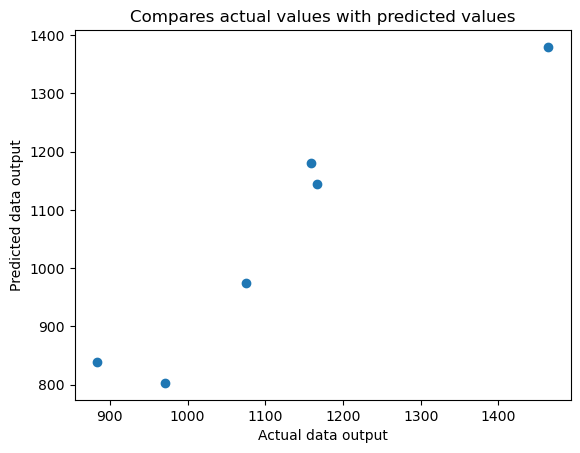

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual data output")
plt.ylabel("Predicted data output")
plt.title("Compares actual values with predicted values")
# If predictions are perfect, points lie on the 45° line y=x

Points close to diagonal → good predictions : Here we have this case

Points far away → large error

Random spread → weak model

Tight cluster near diagonal → strong model

In [ ]:
# print the error between predicted and actual point 
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


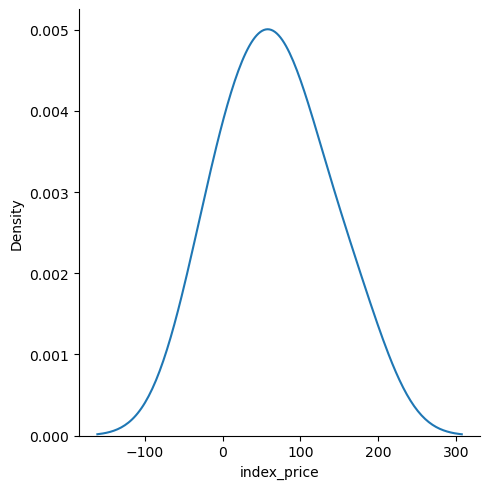

In [61]:
## Plot this residuals
sns.displot(residuals,kind='kde')

This KDE plot shows that the residuals are mostly positive and not centered at zero, indicating that the model is biased and tends to under-predict the target variable.

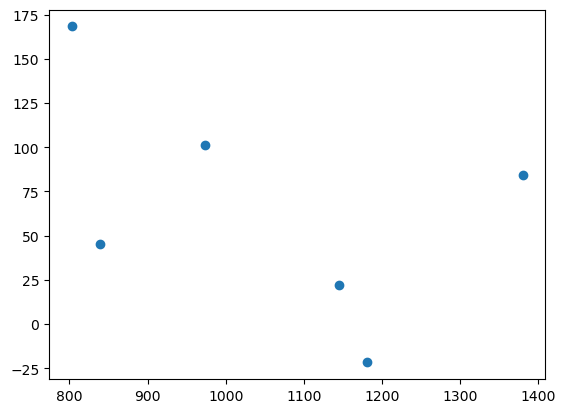

In [ ]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

#### The linear regression model captures the general trend in the data but exhibits systematic bias and non-random residual patterns, indicating underfitting and possible non-linearity in the relationship between features and the target variable. While the model provides a reasonable baseline, performance can be improved through enhanced feature engineering or by using more expressive non-linear models such as polynomial regression or tree-based methods.
